# 马尔可夫模型

## 马尔可夫链
> 马尔可夫链（英语：Markov chain），又称离散时间马尔可夫链（discrete-time Markov chain，缩写为DTMC[1]），因俄国数学家安德烈·马尔可夫（俄语：Андрей Андреевич Марков）得名，为状态空间中经过从一个状态到另一个状态的转换的随机过程。该过程要求具备“无记忆”的性质：下一状态的概率分布只能由当前状态决定，在时间序列中它前面的事件均与之无关。这种特定类型的“无记忆性”称作马尔可夫性质。马尔科夫链作为实际过程的统计模型具有许多应用。

在马尔可夫链的每一步，系统根据概率分布，可以从一个状态变到另一个状态，也可以保持当前状态。状态的改变叫做转移，与不同的状态改变相关的概率叫做转移概率。随机漫步就是马尔可夫链的例子。随机漫步中每一步的状态是在图形中的点，每一步可以移动到任何一个相邻的点，在这里移动到每一个点的概率都是相同的（无论之前漫步路径是如何的）。

### Page Rank


#### 练习：人口预测
参考链接：http://www.qlcoder.com/task/765f

这里是40w经过脱敏的人口迁移样本。

数据共有40万行，每行有3列，分别代表一个中国公民（脱敏后用整数表示），2014年所在省份(用0-30代表省份)，2015年所在省份(用0-30代表省份)。另外，2015年31个省级行政区的初始人数分别为(列表下标为0-30，分别代表每个省的初始人口)(不含港澳台):

[16389723,10262186,20593430,71685839,49425543,88979305,8060519, 68538709,33484131,23071690,41755874,26457769,36884039,56493891, 33397663,42181417,89855501,90028072,52745625,61911446,43970320, 26994017,76207174,33571308,43626674,34462115,24052594,2837769, 5284525,5970133,20802249]

请顺着小明的思路，预测出5年后，即2020年时的各省人数。

In [8]:
import numpy as np
data = np.genfromtxt('data/population_migration.csv', delimiter=',', dtype=int)[1:,1:]

In [20]:
p=np.array([16389723,10262186,20593430,71685839,49425543,
             88979305,8060519, 68538709,33484131,23071690,
             41755874,26457769,36884039,56493891,33397663,
             42181417,89855501,90028072,52745625,61911446,
             43970320,26994017,76207174,33571308,43626674,
             34462115,24052594,2837769,5284525,5970133,20802249]).reshape(-1,1)

T = np.zeros((31,31),dtype=int)
for i,j in data:
    T[j,i] += 1
T = T/T.sum(axis=0)

for i in range(5):
    p = T.dot(p)
    
print(','.join(list(map(lambda x: str(x),p.flatten()))))

22080687.9917,18074514.1364,25747941.0782,68193668.1071,49324426.9165,82589974.7311,18259171.9931,60487193.5457,37111558.0807,29912832.8129,41856446.4062,31249128.6046,39037671.8057,51464807.9207,36727541.3038,42335758.3191,74992064.919,75739255.1716,50081691.571,55377523.0985,43992688.5404,31360292.6331,67110303.2396,36244603.8338,42515516.8707,37785669.2016,29481361.6789,5461265.18045,6738722.00525,7731560.39447,20915407.9082


In [19]:
# [[19,19],[16,16],[26,26],...]

print(data)
for i,j in data:
    print(i,j)
    break

[[19 19]
 [16 16]
 [26 26]
 ..., 
 [20 20]
 [ 0  0]
 [26 26]]
19 19


## MCMC

A = p(n) * T(n->o) / p(o) T(o->n) ?<1

http://statweb.stanford.edu/~cgates/PERSI/papers/MCMCRev.pdf

27.7988304987
25.1242418039


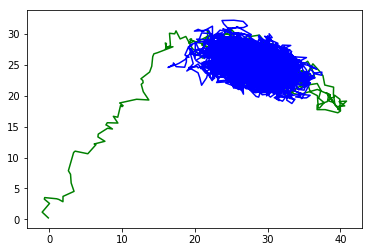

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal as mvn

# p
mu = np.array([28,25]); sigma2 = np.array([[9,-3],[-3,4]])
p = lambda x: mvn.pdf(x, mean=mu, cov=sigma2)

N = 10000

xo = np.array([0,0])
X = np.zeros((N,2))

# T
for i in range(N):
    delta = np.random.normal(size = 2)
    xn = xo + delta
    po = p(xo)
    pn = p(xn)
    A = pn/po
    if A>=1:
        X[i,:] = xn
        xo = xn
    else:
        if np.random.random()<A:
            X[i,:] = xn
            xo = xn
        else:
            X[i,:] = xo

print(X[2000:,0].mean())
print(X[2000:,1].mean())
# plt.subplot(211)
# plt.plot(X[:,0])
# plt.subplot(212)
# plt.plot(X[:,1])
# plt.show()
            
plt.plot(X[:1001,0],X[:1001,1],'g-')
plt.plot(X[1000:,0],X[1000:,1],'b-')
plt.show()